In [4]:
import os
import pandas as pd
import numpy as np
train_data = pd.read_csv("input/train.csv")
train_data.head()
# feature cleaning
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())
test_data = pd.read_csv("input/test.csv")
test_data.head()
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].mean())
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].mean())
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

print(X_test.isnull().values.any())
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
#model = LogisticRegression(solver="liblinear")
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('output/my_submission_rf.csv', index=False)
print("Your submission was successfully saved!")

% of women who survived: 0.7420382165605095
False
Your submission was successfully saved!


In [ ]:
# **********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4   

/Users/mtdp1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mtdp1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mtdp1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

DATA HEAD : **************************************************************************
    Pclass  SibSp  Parch     Fare  Age  FimalySize  Sex_female  Sex_male  \
3       1      1      0  53.1000    0           2           1         0   
4       3      0      0   8.0500    0           1           0         1   
5       3      0      0   8.4583    0           1           0         1   
6       1      0      0  51.8625    0           1           0         1   
7       3      3      1  21.0750    1           5           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
3           0           0           1  
4           0           0           1  
5           0           1           0  
6           0           0           1  
7           0           0           1   

DATA HEAD : **************************************************************************
     Pclass  SibSp  Parch     Fare  Age  FimalySize  Sex_female  Sex_male  \
0        3      1      0   7.2500    0           2     

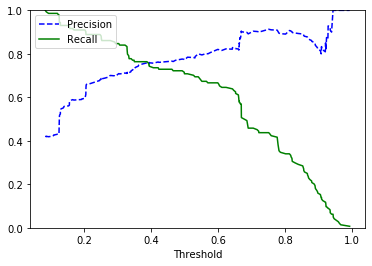

auc:  0.8718577174459528


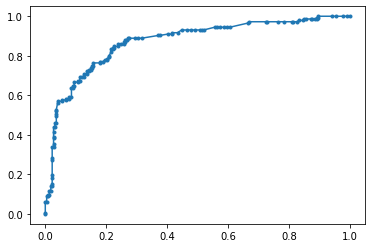

RF ---Model Evaluation Report:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
[[197  24]
 [ 37 107]]
precision:  0.816793893129771
recall:  0.7430555555555556
f1-score:  0.7781818181818182


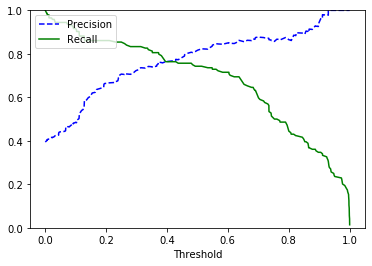

auc:  0.8585658622423329


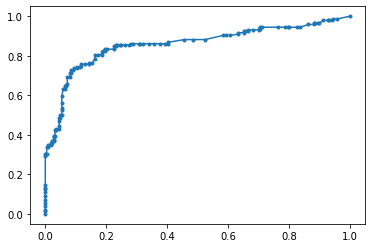

XGB ---Model Evaluation Report:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)
[[204  17]
 [ 46  98]]
precision:  0.8521739130434782
recall:  0.6805555555555556
f1-score:  0.7567567567567568


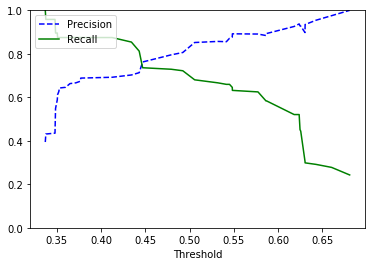

auc:  0.8666729512317748


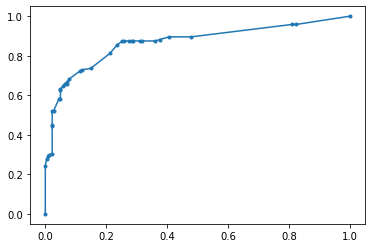

output/sub_XGB_2020-02-24 18:06:03.108094.csv
Your submission output/sub_XGB_2020-02-24 18:06:03.108094.csv was successfully saved!


In [17]:
# *************************        Phase0: packages & methods *****************************
import datetime
import random
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# data analysis methods:
def info_print(header, content):
    print(header, ': **************************************************************************\n', content, '\n')
    
def value_counts(df):
    for fea in df.columns:
        print(df[fea].value_counts())
        
def group_comparison(df, label, features):
    for fea in features:
        print(df[[fea, label]].groupby([fea], as_index=False).mean().sort_values(by=label, ascending=False))
    
def facet_grid(df, label):
    for fea in df.columns:
        if fea != label :
            grid = sns.FacetGrid(df, col=label)
            grid.map(plt.hist, fea, bins=20)
            plt.show()
            
def box_report(df):
    for fea in df.columns:
        if fea != label :
            sns.boxplot(x = fea, data=df)
            plt.show()
    
def corr_heatmap(df, label, k):
    corr = train_data.corr()
    sns.heatmap(corr, vmax=.8, square=True)
    plt.show()
    print(round(corr, 2))
    cols = corr.nlargest(k, label)[label].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
def null_report(df):
    print('Null Statistics: **************************************************************************')
    print('COLUMN'.ljust(20), 'NULL CNT'.ljust(20), 'NULL RATE')
    for i in df.columns:
        d=len(df) - df[i].count()
        r=(d / len(df)) * 100
        rate='%.2f%%' % r
        print(str(i).ljust(20), str(d).ljust(20), rate)

# feature engineering methods:  
def tv_split(train_data, t_ratio):
    random.seed(23)
    train_data['rand'] = train_data[label].apply(lambda x: random.random())
    # T - training set, V - validation set
    train_data_T = train_data[train_data.rand <= t_ratio]
    train_data_V = train_data[train_data.rand > t_ratio]
    return train_data_T, train_data_V

def feature_engineering(df, label, features, features_np):
    y = ''
    if label in df.columns:
        y = df[label]
     
    X = df[features]
    null_process2(X, features_np)
    
    # special engineering
    if 'Name' in features:
        X["Name"] = X["Name"].apply(getName)
    X["FimalySize"] = X["SibSp"] + X["Parch"] + 1
    X["Age"] = X["Age"].apply(lambda x: 1 if x < 15 else 0)
    
    X = pd.get_dummies(X)

    return X, y

def getName(name):
    if "Mr" in str(name):
        return 1
    elif "Mrs" in str(name):
        return 2
    else:
        return 0     
# def null_process(train_data, test_data, cols):
#     for col in cols:
#         train_data[col] = train_data[col].fillna(train_data[col].mean())
#         test_data[col] = test_data[col].fillna(train_data[col].mean())
        
def null_process2(df, cols):
    for col in cols:
        df[col] = df[col].fillna(df[col].mean())

# training methods:
def training_pipeline(X_train, y_train, model_map):
    for k in model_map.keys():
        model = model_map[k]
        model.fit(X_train, y_train)

        
# evaluation methods:
def evaluate_pipeline(X_valid, y_valid, model_map):
    for k in model_map.keys():
        model = model_map[k]
        print(k, "---Model Evaluation Report: ", model)
        evaluate(model, X_valid, y_valid)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.clf()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()
    
def evaluate_binary_clf_prob(y_actual, y_prob):
    plt.clf()
    precisions, recalls, thresholds = precision_recall_curve(y_actual, y_prob)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    plt.plot(fpr, tpr, marker='.')
    auc = roc_auc_score(y_actual, y_prob)
    print('auc: ', auc)
    plt.show()

def evaluate_binary_clf_bin(y_actual, y_bin):
    plt.clf()
    print(confusion_matrix(y_actual, y_bin))
    print('precision: ', precision_score(y_actual, y_bin))
    print('recall: ', recall_score(y_actual, y_bin))
    print('f1-score: ', f1_score(y_actual, y_bin))
    
def evaluate(model, X, y):
    y_bin = model.predict(X)
    y_prob = model.predict_proba(X)[::,1]
    evaluate_binary_clf_bin(y, y_bin)
    evaluate_binary_clf_prob(y, y_prob)
        
### *************************   Phase 1: data visualization and analysis *****************************
train_data = pd.read_csv("input/train.csv")
label = 'Survived'

print (train_data.info())

show_data_report = False
if show_data_report:
    info_print('DATA DESCRIBE', round(train_data.describe(), 2))
    info_print('DATA HEAD', train_data.head(5))
    

# possible feature extraction
all_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
discrete_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
continuous_feas = ['Fare', 'Age']

group_comparison(train_data, label, discrete_cols)
# value_counts(train_data)
if show_data_report:
    box_report(train_data[continuous_feas])#todo: how to deal with outliers?
    null_report(train_data)

#todo: how to analyse without modifying data
# facet_grid(train_data, label)
# corr_heatmap(train_data, label, 20)

# *************************     Phase2: feature engineering *****************************
# features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age', 'Name']
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']

t_ratio = 0.6
train_data_T, train_data_V = tv_split(train_data, t_ratio)

X_train_T, y_train_T = feature_engineering(train_data_T, label, features, continuous_feas)
X_train_V, y_train_V = feature_engineering(train_data_V, label, features, continuous_feas)


test_data = pd.read_csv("input/test.csv")

X_test, y_test = feature_engineering(test_data, label, features, continuous_feas)

info_print('DATA HEAD', X_train_T.head(5))
info_print('DATA HEAD', X_train_V.head(5))
info_print('DATA HEAD', X_test.head(5))
# print(X_test.isnull().values.any())

# *************************     Phase3: model training & evaluating *****************************
model_map = {}
model_map['LR'] = LogisticRegression(solver="liblinear")
model_map['RF'] = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
model_map['XGB'] = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators = 50, silent=True, objective='binary:logistic')

# model_map['XGB_GSCV'] = GridSearchCV(estimator = XGBClassifier(learning_rate=0.01, max_depth=5, silent=True, objective='binary:logistic'), 
#                                      param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': range(30, 150, 10), 'max_depth': range(3, 15, 1)}, 
#                                      scoring='f1', cv=5)

training_pipeline(X_train_T, y_train_T, model_map)
evaluate_pipeline(X_train_V, y_train_V, model_map)

best = 'XGB'

y_test = model_map[best].predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
output_filename = 'output/sub_' + best + '_' + str(datetime.datetime.now()) + '.csv'
print(output_filename)
output.to_csv(output_filename, index=False)
print('Your submission ' + output_filename + ' was successfully saved!')

In [8]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
]

In [9]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [16]:
#create table to compare MLA predictions
MLA_predict = y_train_V

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train_V, y_train_V, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train_T, y_train_T)
    MLA_predict[MLA_name] = alg.predict(X_train_V)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

ValueError: Found input variables with inconsistent numbers of samples: [365, 366]

In [13]:
cv_results

{'fit_time': array([0.04891992, 0.04935074, 0.04665279, 0.05175805, 0.0442512 ,
        0.04091501, 0.03769016, 0.03833389, 0.03833318, 0.04212499]),
 'score_time': array([0.0077672 , 0.00773215, 0.01076031, 0.00683379, 0.00650787,
        0.00575781, 0.00522995, 0.00595903, 0.00517082, 0.0058651 ]),
 'test_score': array([0.76363636, 0.81818182, 0.76363636, 0.77272727, 0.80909091,
        0.68181818, 0.83636364, 0.83636364, 0.73636364, 0.81818182])}